In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ML Final/heart_attack_prediction_dataset.csv')
data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [ ]:
X = data.drop(['Heart Attack Risk', 'Patient ID'], axis=1)
y = data['Heart Attack Risk']

# Perform one-hot encoding on categorical columns
categorical_cols = ['Sex', 'Diet', 'Country', 'Continent','Blood Pressure', 'Hemisphere']
encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X[categorical_cols])
encoded_cols = encoder.get_feature_names_out(categorical_cols)
X_encoded = pd.DataFrame(X_encoded, columns=encoded_cols, index=X.index)

# Concatenate the encoded categorical columns with the remaining numerical columns
X_final = pd.concat([X.drop(categorical_cols, axis=1), X_encoded], axis=1)

print(X_final, y)



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


      Age  Cholesterol  Heart Rate  Diabetes  Family History  Smoking  \
0      67          208          72         0               0        1   
1      21          389          98         1               1        1   
2      21          324          72         1               0        0   
3      84          383          73         1               1        1   
4      66          318          93         1               1        1   
...   ...          ...         ...       ...             ...      ...   
8758   60          121          61         1               1        1   
8759   28          120          73         1               0        0   
8760   47          250         105         0               1        1   
8761   36          178          60         1               0        1   
8762   25          356          75         1               1        0   

      Obesity  Alcohol Consumption  Exercise Hours Per Week  \
0           0                    0                 4.168189 

In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns
# Let's explore the dataset by visualizing the distributions and relationships between variables

sns.pairplot(data, hue='Heart Attack Risk')

plt.show()



# Correlation Heatmap

corr = data.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap')

plt.show()

Output hidden; open in https://colab.research.google.com to view.

                      Feature    Importance
14                        BMI  4.702887e-02
15              Triglycerides  4.692310e-02
13                     Income  4.679071e-02
12    Sedentary Hours Per Day  4.666366e-02
8     Exercise Hours Per Week  4.642182e-02
...                       ...           ...
2320    Blood Pressure_153/67  1.789973e-06
381     Blood Pressure_107/72  1.770397e-06
3474    Blood Pressure_179/78  1.752866e-06
1012    Blood Pressure_122/62  1.635704e-06
1491    Blood Pressure_133/86  5.811815e-07

[3966 rows x 2 columns]


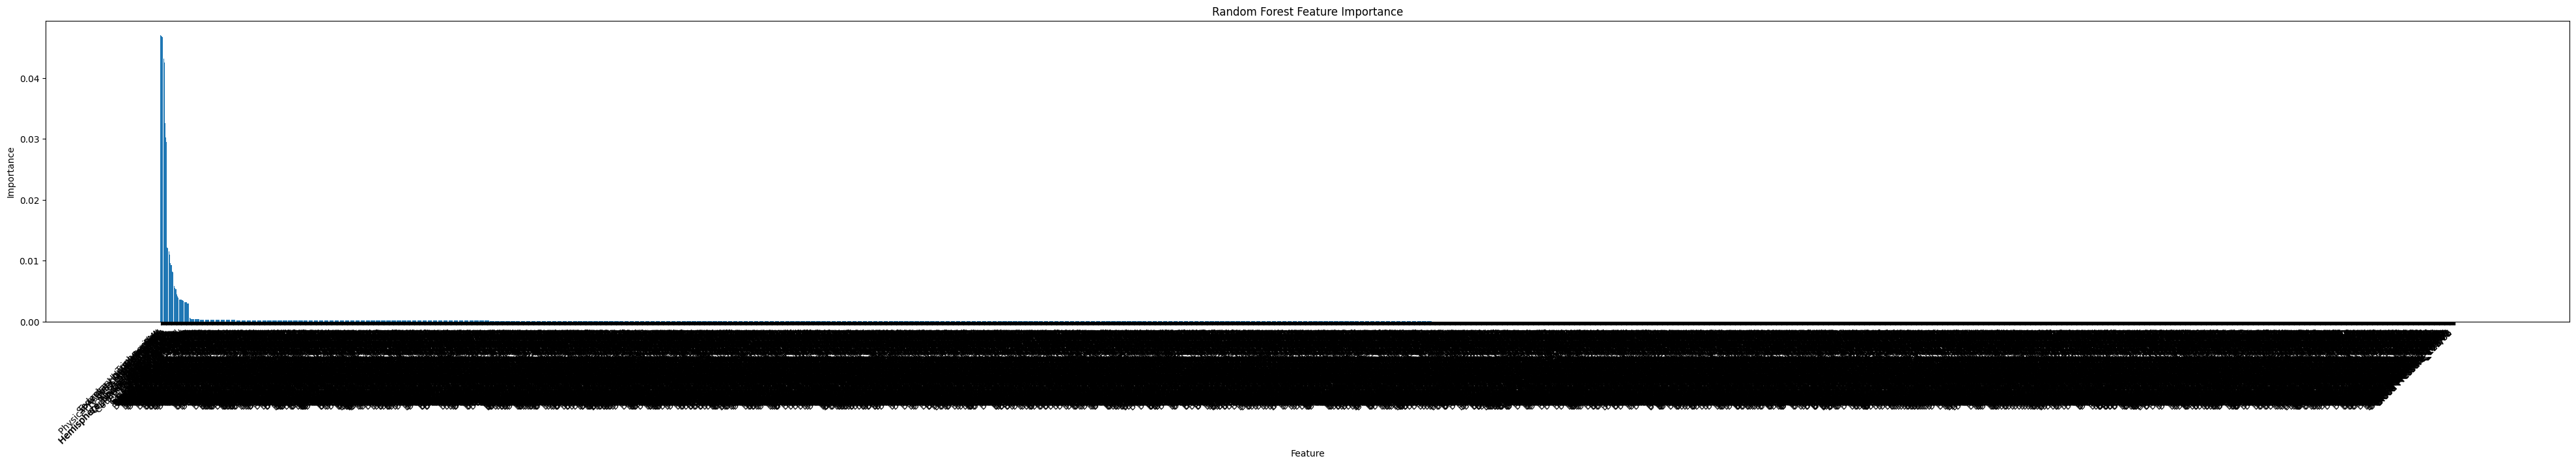

In [ ]:

from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt



# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Fit the model on the data
rf_model.fit(X_final, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X_final.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(50, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
# Assuming your feature_importance_df is already sorted by importance
non_zero_importance_features = feature_importance_df[feature_importance_df['Importance'] > 0]['Feature'].tolist()

# Keep only features with non-zero importance in your dataset
X_final_reduced = X_final[non_zero_importance_features]


print(X_final_reduced)


            BMI  Triglycerides  Income  Sedentary Hours Per Day  \
0     31.251233            286  261404                 6.615001   
1     27.194973            235  285768                 4.963459   
2     28.176571            587  235282                 9.463426   
3     36.464704            378  125640                 7.648981   
4     21.809144            231  160555                 1.514821   
...         ...            ...     ...                      ...   
8758  19.655895             67  235420                10.806373   
8759  23.993866            617  217881                 3.833038   
8760  35.406146            527   36998                 2.375214   
8761  27.294020            114  209943                 0.029104   
8762  32.914151            180  247338                 9.005234   

      Exercise Hours Per Week  Cholesterol  Heart Rate  Age  Stress Level  \
0                    4.168189          208          72   67             9   
1                    1.813242          38

In [ ]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final_reduced, y, test_size=0.2, random_state=42)

# Initialize and fit LDA without specifying n_components
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)

# Print the explained variance ratio (optional)
print("Explained Variance Ratio:", lda.explained_variance_ratio_)

# Initialize RandomForestClassifier
rf_model_lda = RandomForestClassifier(random_state=42)

# Fit the model on the LDA-transformed training data
rf_model_lda.fit(X_train_lda, y_train)

# Transform the test set using the same LDA transformation
X_test_lda = lda.transform(X_test)

# Make predictions on the test set
y_pred_lda = rf_model_lda.predict(X_test_lda)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred_lda)
print("Accuracy with LDA:", accuracy)


Explained Variance Ratio: [1.]
Accuracy with LDA: 0.5373645179691957


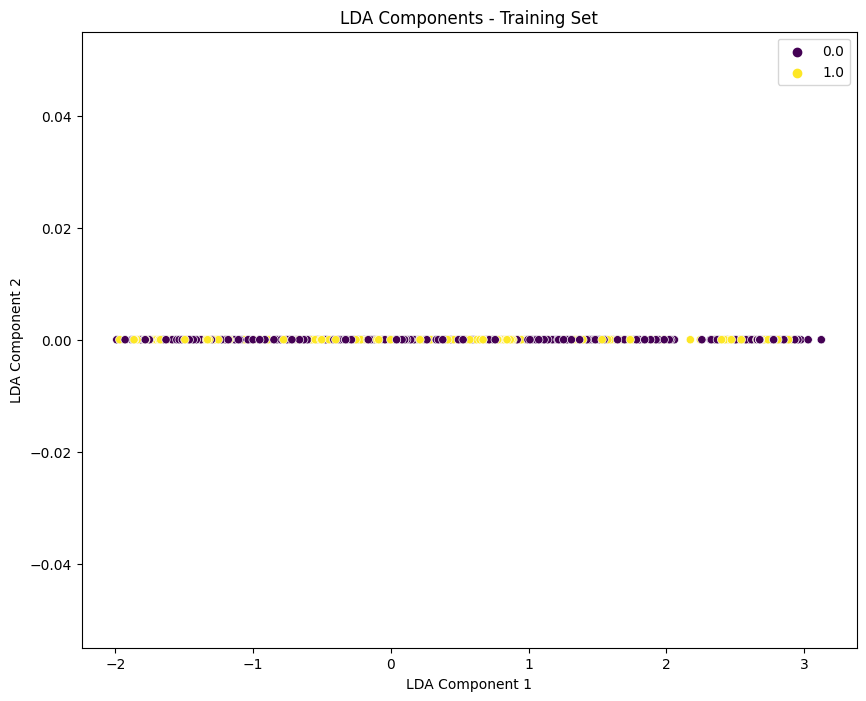

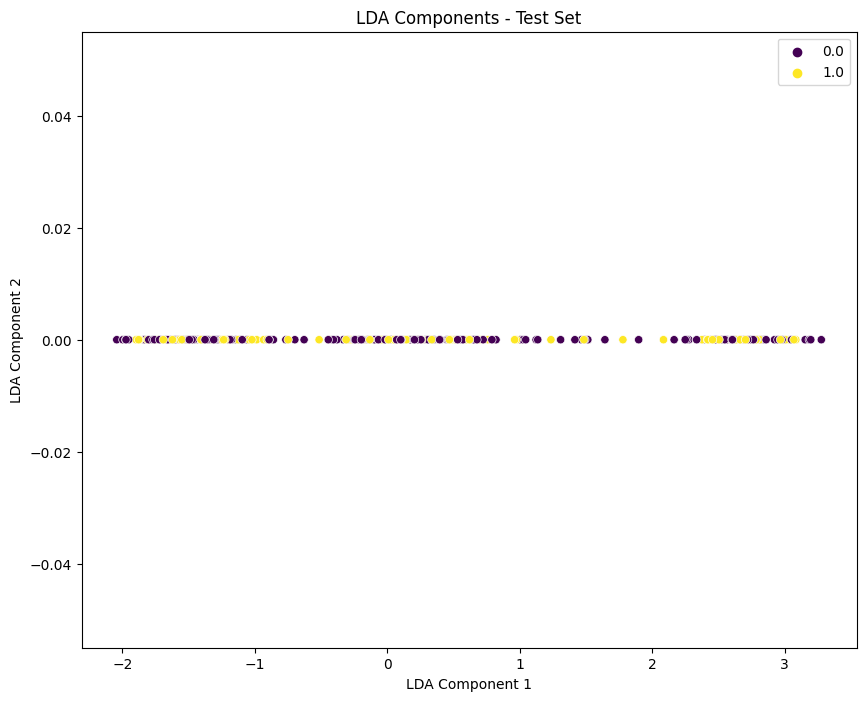

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the LDA components for the training set
lda_train_df = pd.DataFrame(data=X_train_lda, columns=['LDA_Component_1'])
lda_train_df['Target'] = y_train  # Add the target variable to the DataFrame

plt.figure(figsize=(10, 8))
sns.scatterplot(x='LDA_Component_1', y=0, hue='Target', data=lda_train_df, palette='viridis')
plt.title('LDA Components - Training Set')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.legend()
plt.show()

# Plot the LDA components for the test set
lda_test_df = pd.DataFrame(data=X_test_lda, columns=['LDA_Component_1'])
lda_test_df['Target'] = y_test  # Add the target variable to the DataFrame

plt.figure(figsize=(10, 8))
sns.scatterplot(x='LDA_Component_1', y=0, hue='Target', data=lda_test_df, palette='viridis')
plt.title('LDA Components - Test Set')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.legend()
plt.show()




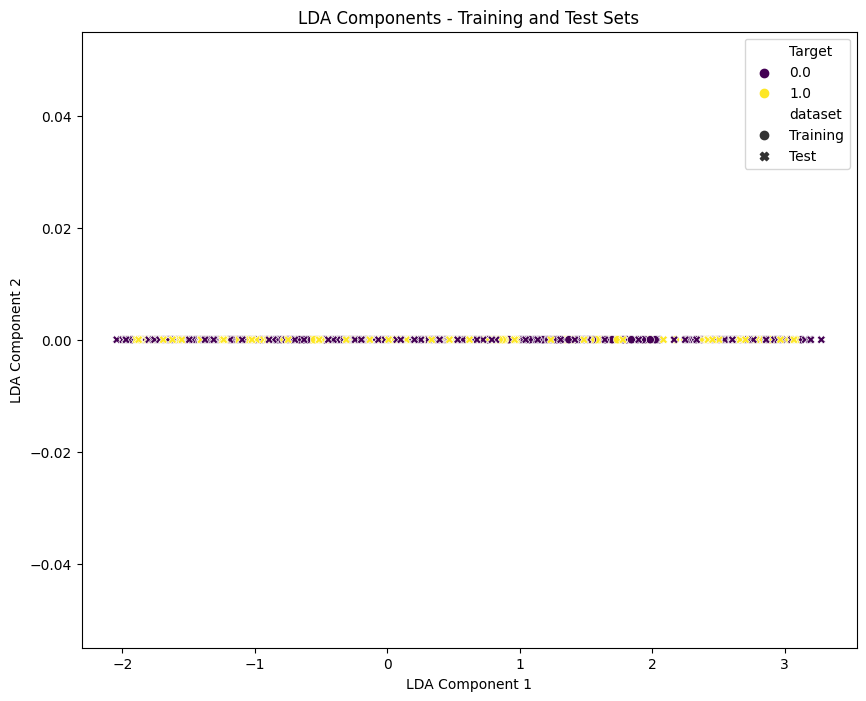

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Concatenate training and test DataFrames
lda_combined_df = pd.concat([lda_train_df.assign(dataset='Training'), lda_test_df.assign(dataset='Test')])

# Plot the LDA components for both training and test sets
plt.figure(figsize=(10, 8))
sns.scatterplot(x='LDA_Component_1', y=0, hue='Target', style='dataset', data=lda_combined_df, palette='viridis')
plt.title('LDA Components - Training and Test Sets')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.legend()
plt.show()


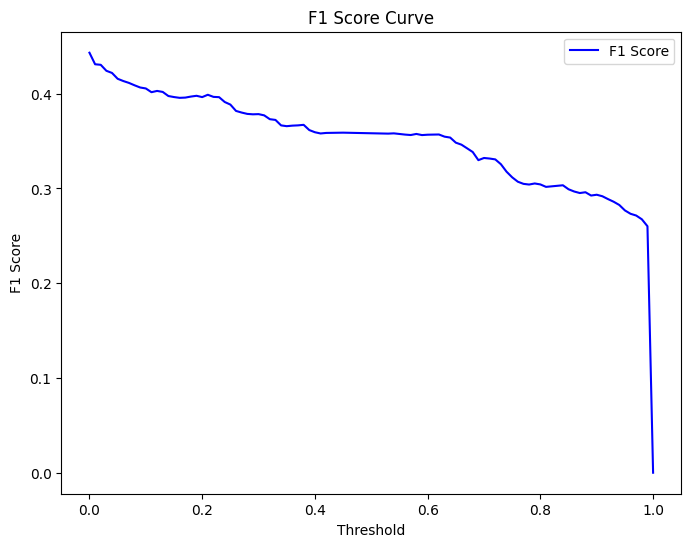

In [ ]:
from sklearn.metrics import precision_recall_curve, f1_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class from the trained model
y_pred_proba = rf_model_lda.predict_proba(X_test_lda)[:, 1]

# Calculate precision-recall pairs for different probability thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Calculate the F1 score for each threshold
f1_scores = [f1_score(y_test, y_pred_proba > threshold) for threshold in thresholds]

# Plot the F1 curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_scores, label='F1 Score', color='blue')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score Curve')
plt.legend()
plt.show()


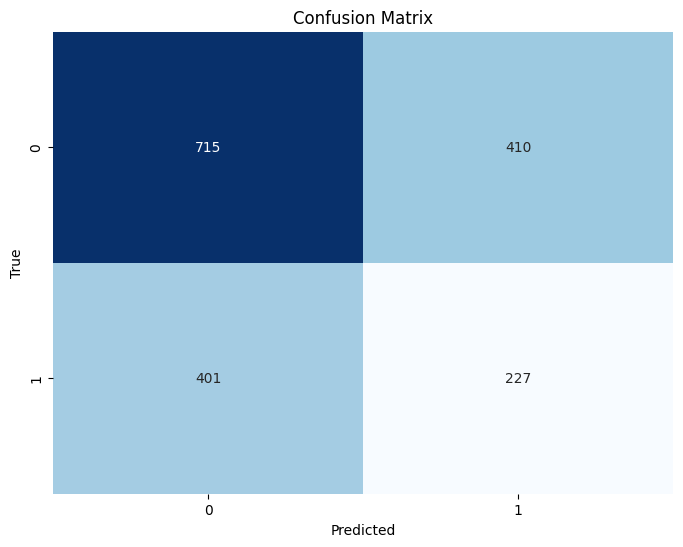

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred_lda)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


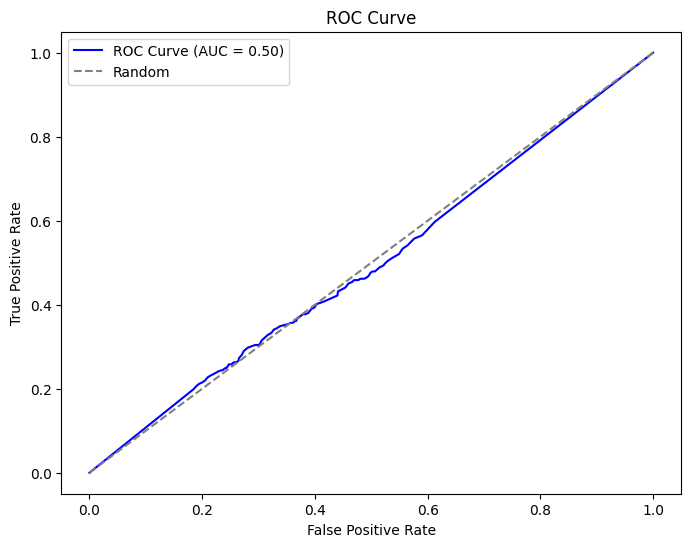

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class from the trained model
y_pred_proba = rf_model_lda.predict_proba(X_test_lda)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC (Area Under the Curve) for the ROC curve
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


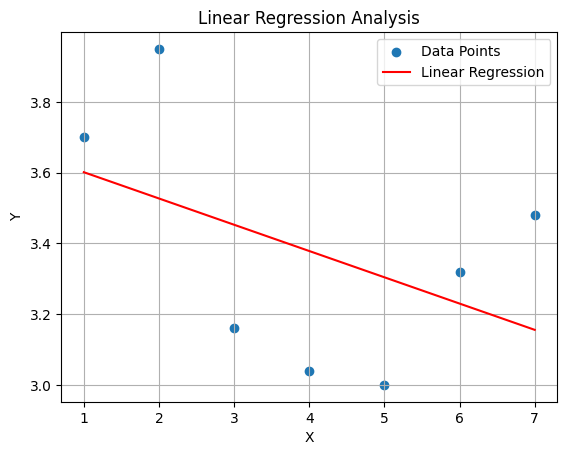

The points are nonlinear.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Given points
x = np.array([1, 2, 3, 4, 5, 6, 7])
y = np.array([3.70, 3.95, 3.16, 3.04, 3.00, 3.32, 3.48])

# Reshape x for sklearn compatibility
x_reshaped = x.reshape(-1, 1)

# Linear regression
model = LinearRegression()
model.fit(x_reshaped, y)
y_pred = model.predict(x_reshaped)

# Plotting
plt.scatter(x, y, label='Data Points')
plt.plot(x, y_pred, color='red', label='Linear Regression')

plt.title('Linear Regression Analysis')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

# Check if linear or nonlinear based on R-squared value
r2 = r2_score(y, y_pred)
if r2 == 1:
    print("The points are linear.")
else:
    print("The points are nonlinear.")




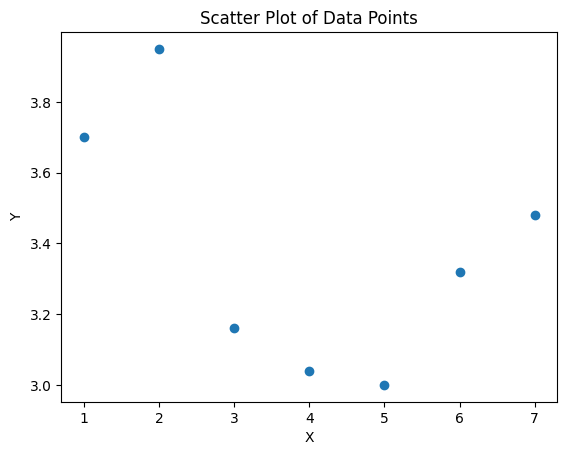

Correlation Coefficient: -0.45410950582355564
The relationship between the points is: Nonlinear


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Given data points
x = np.array([1, 2, 3, 4, 5, 6, 7])
y = np.array([3.70, 3.95, 3.16, 3.04, 3.00, 3.32, 3.48])

# Create a scatter plot
plt.scatter(x, y)
plt.title('Scatter Plot of Data Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Calculate the correlation coefficient
corr_coeff, _ = pearsonr(x, y)

# Determine if the points are linear or nonlinear
if corr_coeff == 1 or corr_coeff == -1:
    relationship = "Linear"
else:
    relationship = "Nonlinear"

# Print results
print(f"Correlation Coefficient: {corr_coeff}")
print(f"The relationship between the points is: {relationship}")
